In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the cleaned data
df = pd.read_csv('CSV_files/House_pricing_cleaned.csv')

In [5]:
#df.info()

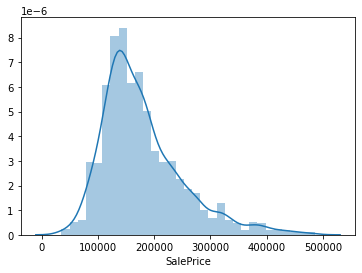

In [6]:
sns.distplot(df['SalePrice'])
# Normally distributed

In [7]:
# In a dataset of 1460 observations only 9 of them are above 500000 and theefore are considered as outliers.
# Dropping them

df = df[df['SalePrice']<500000]

In [8]:
corr_data = df.corr()['SalePrice'].sort_values()
#corr_data

In [9]:
#df.columns

In [10]:
# Making a dataframe without features having high correlation to check the impact difference

df_col_removed = df.drop(labels=['MSSubClass','OverallCond','YrSold','BsmtHalfBath',
'LowQualFinSF','MiscVal','BsmtFinSF2','PoolArea','3SsnPorch','MoSold','ScreenPorch'],axis=1)

In [11]:
#df.info()

In [12]:
# Creating only numeric data dataframe
num_df = df.select_dtypes('number')

In [13]:
# Creating only object data dataframe
str_df = df.select_dtypes('object')

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley,Reg,Lvl,AllPub,Inside,...,0,No pool,No fence,No misc,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley,Reg,Lvl,AllPub,FR2,...,0,No pool,No fence,No misc,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley,IR1,Lvl,AllPub,Inside,...,0,No pool,No fence,No misc,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley,IR1,Lvl,AllPub,Corner,...,0,No pool,No fence,No misc,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley,IR1,Lvl,AllPub,FR2,...,0,No pool,No fence,No misc,0,12,2008,WD,Normal,250000


In [15]:
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
str_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No pool,No fence,No misc,WD,Normal
1,RL,Pave,No alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No pool,No fence,No misc,WD,Normal
2,RL,Pave,No alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No pool,No fence,No misc,WD,Normal
3,RL,Pave,No alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No pool,No fence,No misc,WD,Abnorml
4,RL,Pave,No alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No pool,No fence,No misc,WD,Normal


In [17]:
# Getting dummy variables from the categorical variables
str_df = pd.get_dummies(str_df)

In [18]:
# Joining both dataframes to create final dataframe
final_df = pd.concat([num_df,str_df],axis=1)

In [19]:
# Separating dependent and independent(target) variables
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Splitting for train,test as 33% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
df.to_csv('CSV_files/House_pricing_cleaned.csv',index=False)

In [23]:
final_df.to_csv('CSV_files/Dummy_house_pricing.csv',index=False)

In [24]:
X_train.to_csv('CSV_files/X_train.csv',index=False)
X_test.to_csv('CSV_files/X_test.csv',index=False)
y_train.to_csv('CSV_files/y_train.csv',index=False)
y_test.to_csv('CSV_files/y_test.csv',index=False)